In [2]:
# import cv2
import imutils
# import pytesseract
from matplotlib.pyplot import imshow, show, subplot, title, hist
from skimage.color import rgb2gray, gray2rgb, rgb2hsv, rgb2lab, lab2rgb
from skimage import io, exposure

### Reading Image

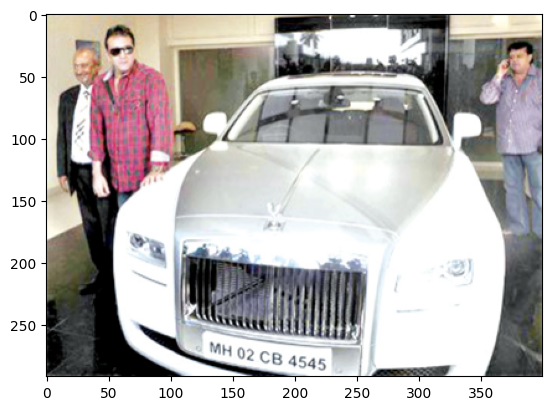

In [3]:
# car_image = io.imread("../dataset/Cars0.png")
# car_image = io.imread("../test.jpeg")
# car_image = io.imread("../text_page.png")
car_image = io.imread("../dataset/Cars263.png")
# "C:\Users\0000\Documents\Codes\Csci451_Project\dataset\Cars263.png"
imshow(car_image);

### RGB to GrayScale

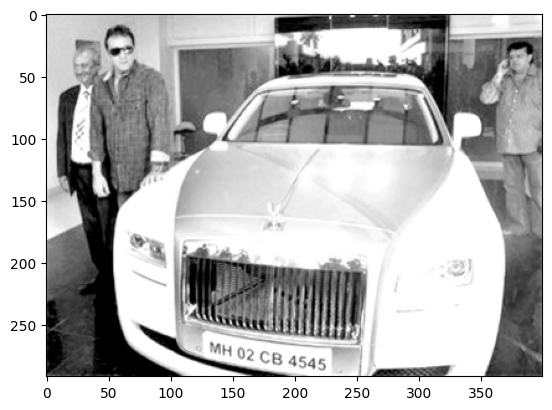

In [5]:
# RGB2GRAY return values from 0 to 1 
# I am just converting them to 256 range
# car_image_gray = (rgb2gray(car_image)*255).astype('uint8')
# Should be used if image in png format
car_image_gray = (rgb2gray(car_image[:,:,:3])*255).astype('uint8')
imshow(car_image_gray, "gray")

### Displaying histogram

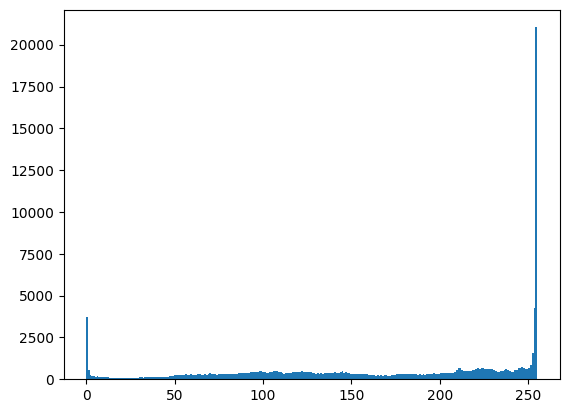

In [6]:
car_image_histogram = exposure.histogram(car_image_gray)[0]
hist(car_image_gray.ravel(),bins=256)
show()

### Determine filter type

In [7]:
# 256 / 2 = 128
# 128 / 2 = 64
# dividing for 4 parts

dark1 = sum(car_image_histogram[0:64])
dark2 = sum(car_image_histogram[64:128])
bright2 = sum(car_image_histogram[128:192])
bright1 = sum(car_image_histogram[192:256])

print(dark1)
print(dark2)
print(bright2)
print(bright1)

# Idea we may iterate more than one time to get good histogram if dark2 + bright2 
# is bigger than bright1 and dark1 

14163
24276
20062
58299


### Works with dark images

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


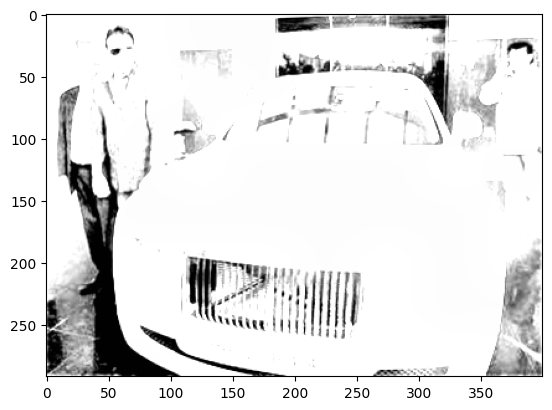

In [8]:
# test = exposure.equalize_hist(car_image_gray)
test = exposure.rescale_intensity(car_image_gray,in_range=(0, 100))
test = exposure.adjust_log(test,gain=1)
test = exposure.equalize_adapthist(test)
imshow(test, "gray")
io.imsave("test2.png",arr=test);
# imshow(car_image_gray, "gray")


### Works with bright images

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


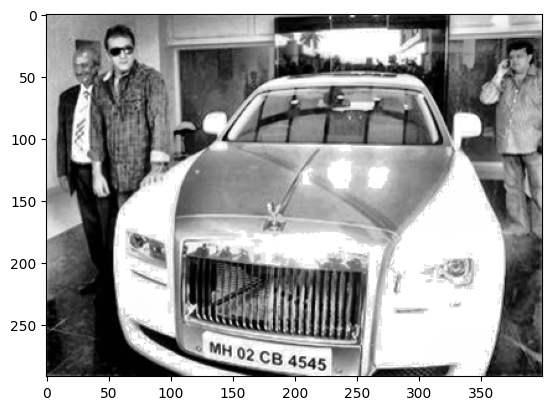

In [46]:
test = exposure.equalize_hist(car_image_gray)
# test = exposure.adjust_log(test,inv=True)
test = exposure.equalize_adapthist(test)
imshow(test, "gray")
io.imsave("test2.png",arr=test);

# imshow(car_image_gray, "gray")
